In [1]:
import keras
from src.Models.MLP import MLP
from src import utilities

#### Loading the data

In [2]:
y_train, X_train, _ = utilities.load_data_for_mlp('../Data/HiggsTrainning.csv')
y_val, X_val, _ = utilities.load_data_for_mlp('../Data/HiggsValidation.csv')
y_test, X_test, _ = utilities.load_data_for_mlp('../Data/HiggsTest.csv')

#### Defining the Model

In [3]:
# creating the model for the MLP
input_layer = keras.layers.Input(shape=[21])
mlp = MLP(num_neurons=32)(input_layer)
output_layer = keras.layers.Dense(2, activation='softmax')(mlp)
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp (MLP)                       │ (None, 32)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,266 (12.76 KB)

 Trainable params: 3,074 (12.01 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
# compiling and trainning the model
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.5404 - loss: 0.7040 - val_accuracy: 0.5879 - val_loss: 0.6642
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.5913 - loss: 0.6662 - val_accuracy: 0.6064 - val_loss: 0.6557
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.6001 - loss: 0.6601 - val_accuracy: 0.6096 - val_loss: 0.6542
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.6056 - loss: 0.6559 - val_accuracy: 0.6176 - val_loss: 0.6462
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.6150 - loss: 0.6506 - val_accuracy: 0.6243 - val_loss: 0.6438
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - accuracy: 0.6150 - loss: 0.6477 - val_accuracy: 0.6273 - val_loss: 0.6407
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - accuracy: 0.6237 - loss: 0.6436 - val_accuracy: 0.6309 - val_loss: 0.6376
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 

#### Some quick checks

In [5]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


In [6]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.6495
Precision: 0.6845
Confusion Matrix:
[[24744  9046]
 [10588 19622]]
Validation set:
Recall: 0.6147
Precision: 0.6475
Confusion Matrix:
[[5913 2529]
 [2912 4646]]
Test set:
Recall: 0.6235
Precision: 0.6481
Confusion Matrix:
[[7420 3182]
 [3539 5860]]


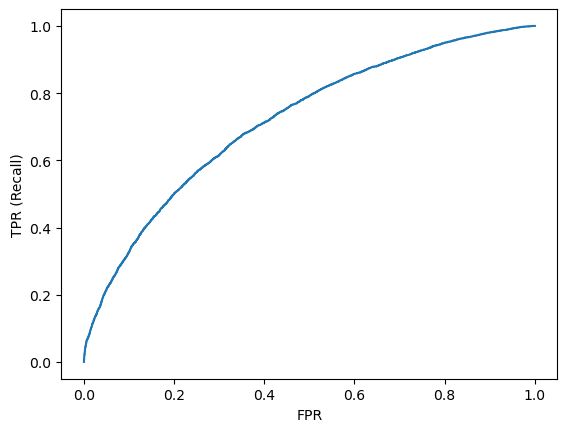

AUC: 0.7199


In [7]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

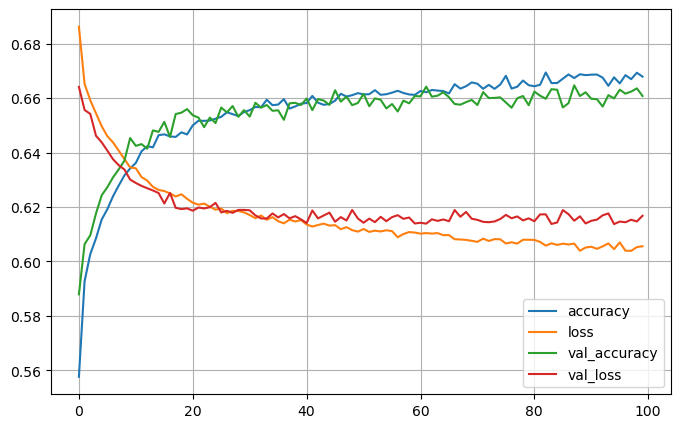

In [8]:
utilities.plot_hist_trainning(history)

In [9]:
utilities.save_model(model, history, "ModelFiles/MLP")